Laplace Immo est un réseau national d’agences immobilière. Il souhaite disposer d'un algorithme de prédiction des prix des maisons. Avec 79 variables explicatives décrivant (presque) tous les aspects des maisons résidentielles à Ames(Iowa, US), ce projet a pour objectif de construire un modèle de prédiction du prix final de chaque maison. Il est réalisé par quatre élèves ingénieurs statisticiens économistes:


1.   Jean Pierre Adiouma NDIAYE
2.   Aiisata GUEYE
3.   Mouhamed El Moustapha DIOP
4.   Stewart NFEGUE ZOFOA

Avant de faire une prédiction, il est d'une impérieuse nécessité de faire une analyse exploratoire pour avoir une vue globale des données et sortir quelques statistiques. Ces éléments qui, semblent simples, sont pourtant d'une importance capitale.

# 1. Analyse exploratoire

## 1.1 Importation des librairies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/Jeanpierreadioumandiaye/Machine-Learning-Project/main/trains.csv", sep=',')
train.drop(['Id'], axis = 1, inplace = True)
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
print(f"Nombre d'observations {train.shape[0]}")
print(f"Nombre de variables {train.shape[1]}")
print(f"Nombre de duplications {train.duplicated().sum()} ")

Nombre d'observations 1460
Nombre de variables 80
Nombre de duplications 0 


## 1.2 Valeurs manquantes

### 1.2.1 Association aux vraies valeurs

In [4]:
missing= pd.DataFrame({'%NA':train.isna().mean()*100})
missing = missing.sort_values(by ='%NA' ,ascending = False)
missing['is_na'] = (missing['%NA']!=0)
missing['type'] = train[missing.index].dtypes.apply(lambda x: x.name)

print(f"Nombre de variables avec NA : {missing.is_na.sum()}")
print(f"Nombre de variables sans NA : {(missing.is_na==False).sum()}")
missing[missing.is_na==True]

Nombre de variables avec NA : 19
Nombre de variables sans NA : 61


,%NA,is_na,type
PoolQC,99.520548,True,object
MiscFeature,96.301370,True,object
Alley,93.767123,True,object
Fence,80.753425,True,object
FireplaceQu,47.260274,True,object
LotFrontage,17.739726,True,float64
GarageYrBlt,5.547945,True,float64
GarageCond,5.547945,True,object
GarageType,5.547945,True,object
GarageFinish,5.547945,True,object


A première vue, il semble que plusieurs colonnes ont des valeurs manquantes. Cependant la lecture de la description des données révèle que certaines valeurs manquantes ont une signification particulière.

Nous allons d'abord commencer avec les variables qualitatives, étant donné que des labels sont bien définis

**PoolQC** : Les NA correspondent à des "No Pool"

In [ ]:
train.PoolQC = train['PoolQC'].fillna("No_Pool")
print(f"Nombre de valeurs manquantes : {train['PoolQC'].isna().sum()}")

Nombre de valeurs manquantes : 0


**MiscFeature** : Les NA correspondent à des "None"

In [ ]:
train.MiscFeature = train['MiscFeature'].fillna("None")
print(f"Nombre de valeurs manquantes : {train['MiscFeature'].isna().sum()}")

Nombre de valeurs manquantes : 0


**Alley** : Les NA correspondent à des "No alley access"

In [ ]:
train.Alley = train['Alley'].fillna("No_Alley_Access")
print(f"Nombre de valeurs manquantes : {train['Alley'].isna().sum()}")

Nombre de valeurs manquantes : 0


**Fence** : Les NA correspodent à des "No Fence"

In [ ]:
train.Fence = train['Fence'].fillna("No_Fence")
print(f"Nombre de valeurs manquantes : {train['Fence'].isna().sum()}")

Nombre de valeurs manquantes : 0


**MasVnrType** : Les NA correspondent à des "None"

In [ ]:
train.MasVnrType = train['Fence'].fillna("None")
print(f"Nombre de valeurs manquantes : {train['MasVnrType'].isna().sum()}")

Nombre de valeurs manquantes : 0


**FireplaceQu** Les NA correspondent à des "No Fireplace"

In [ ]:
train.FireplaceQu = train['FireplaceQu'].fillna("No_FirePlace")
print(f"Nombre de valeurs manquantes : {train['FireplaceQu'].isna().sum()}")

Nombre de valeurs manquantes : 0


**GarageCond, GaraType, GarageFinish, GarageQual** : Toutes ces variables sont liées au garage de la maison. D'ailleurs dans le tableau des valeurs manquantes, elles ont toutes le même pourcentage de valeurs manquantes. En réalité, tous les NA correspondent à des "No Garage"

In [ ]:
train.GarageCond = train['GarageCond'].fillna("No_Garage")
print(f"Nombre de valeurs manquantes : {train['GarageCond'].isna().sum()}")

train.GarageType = train['GarageType'].fillna("No_Garage")
print(f"Nombre de valeurs manquantes : {train['GarageType'].isna().sum()}")

train.GarageFinish = train['GarageFinish'].fillna("No_Garage")
print(f"Nombre de valeurs manquantes : {train['GarageFinish'].isna().sum()}")

train.GarageQual = train['GarageQual'].fillna("No_Garage")
print(f"Nombre de valeurs manquantes : {train['GarageQual'].isna().sum()}")

Nombre de valeurs manquantes : 0
Nombre de valeurs manquantes : 0
Nombre de valeurs manquantes : 0
Nombre de valeurs manquantes : 0


**BsmtFinType2, BsmtExposure** : Les NA correspondent à des "No Basement"

In [ ]:
train.BsmtFinType2 = train['BsmtFinType2'].fillna("No_Basement")
print(f"Nombre de valeurs manquantes : {train['BsmtFinType2'].isna().sum()}")

train.BsmtExposure = train['BsmtExposure'].fillna("No_Basement")
print(f"Nombre de valeurs manquantes : {train['BsmtExposure'].isna().sum()}")

Nombre de valeurs manquantes : 0
Nombre de valeurs manquantes : 0


**BsmtQual, BsmtCond, BsmtFinType1** : Les NA correspondent à des "No Basement"

In [ ]:
train.BsmtQual = train['BsmtQual'].fillna("No_Basement")
print(f"Nombre de valeurs manquantes : {train['BsmtQual'].isna().sum()}")

train.BsmtCond = train['BsmtCond'].fillna("No_Basement")
print(f"Nombre de valeurs manquantes : {train['BsmtCond'].isna().sum()}")

train.BsmtFinType1 = train['BsmtFinType1'].fillna("No_Basement")
print(f"Nombre de valeurs manquantes : {train['BsmtFinType1'].isna().sum()}")

Nombre de valeurs manquantes : 0
Nombre de valeurs manquantes : 0
Nombre de valeurs manquantes : 0


**Electrical** : La nature de la valeur manquante nest pas spécifiée dans le "data_description". Cela doit donc surement correspondre à une valeur manquante au vrai sens du terme. Le traitement de cette variable sera laissé à la partie imputation

Allons maintenant vers les variables quantitatives

In [ ]:
missing[(missing.is_na==True) & (missing.type =='float64')]

,%NA,is_na,type
LotFrontage,17.739726,True,float64
GarageYrBlt,5.547945,True,float64
MasVnrArea,0.547945,True,float64


**LotFrontage** : 18% de valeurs manquantes, c'est quand même assez conséquent pour une variable quantitative. Il est préférable de ne pas l'utiliser. Tenter une imputation serait un peu trop risqué.

In [ ]:
train.drop(['LotFrontage'], axis = 1, inplace = True)

**GarageYrBlt** : Il ne s'agit pas là de valeurs manquantes, mais de hors champ. Ces observations correspondent aux maisons qui n'ont pas de garage, donc qui ne sont pas concernées par cette variable. <br>
Les modèles de régression qu'on utilisera ne prennent pas en compte les hors champ, pour les variables quantitatives, d'autant plus qu'il s'agit d'années ici. Il y a donc 3 possibilités : <br>
- Soit on supprime les observations concernées par le hors champ
- Soit on supprime la variable
- Soit on construit des classes d'années, tout en créant une classe "hors_champ"  <br>
Nous allons plûtot opter pour la création de classe, pour ne pas perdre trop d'informations

Minimum : 1900.0
Maximum : 2010.0


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GarageYrBlt', ylabel='Count'>

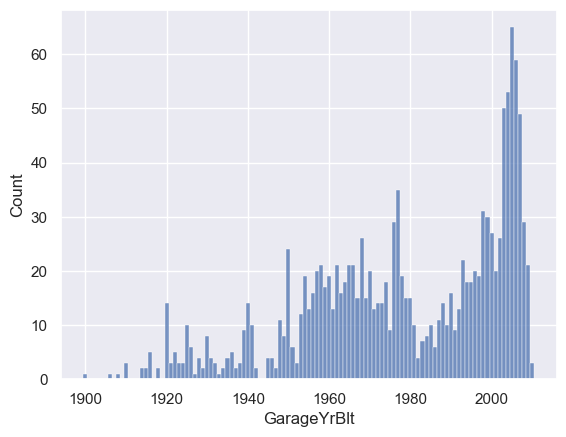

In [ ]:
print(f"Minimum : {train['GarageYrBlt'].min()}")
print(f"Maximum : {train['GarageYrBlt'].max()}")
sns.histplot(data = train, x = 'GarageYrBlt', discrete = True)

In [ ]:
def recode_Garage(var):
    if pd.isna(var):
        return "None"
    elif var < 1950:
        return "1900_1950"
    elif var < 1980:
        return "1950_1980"
    elif var < 2000:
        return "1980_200"
    else:
        return "2000_plus"

train['GarageYrBlt_2'] = train['GarageYrBlt'].map(recode_Garage)

train.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [ ]:
train['GarageYrBlt_2'].value_counts(dropna = False)

GarageYrBlt_2
1950_1980    522
2000_plus    402
1980_200     291
1900_1950    164
None          81
Name: count, dtype: int64

**MasVnrArea** : Le pourcentage de hors champ est très faible, et il ne s'agit pas à priori d'un hors champ, mais bien d'une valeur manquante. Les valeurs seront donc imputées.

### 1.2.2 Imputation

In [ ]:
# Variables à imputer
var_imp = train.columns[train.isna().sum()!=0].tolist()
print(f"Variables à imputer : {var_imp}")

missing[missing.index.isin(var_imp)]

Variables à imputer : ['MasVnrArea', 'Electrical']


,%NA,is_na,type
MasVnrArea,0.547945,True,float64
Electrical,0.068493,True,object


**Au final, l'imputation ne concerne que deux variables**.

In [ ]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

print(f"Nombre de valeurs manquantes MasVnArea : {train['MasVnrArea'].isna().sum()}")
print(f"Nombre de valeurs manquantes Electrical : {train['Electrical'].isna().sum()}")

Nombre de valeurs manquantes MasVnArea : 0
Nombre de valeurs manquantes Electrical : 0


In [ ]:
print(f"Nombre de valeurs manquantes dans la base : {train.isna().sum().sum()}")

Nombre de valeurs manquantes dans la base : 0


## 1.3 Transformation de variables quantitatives en qualitative

Certaines variables sont considérées comme quantitatives, alors qu'en réalité, elles sont qualitatives. <br>
En effet, dans le fichier "data description", pour certaines variables, les labels correspodent  des numéros, faisant référence à une étiquette bien défini. C'est par exemple le cas pour les variables **MSSubClass, OverallQual, OverallCond**. MSSubClass est une variable qualitative nominale, et les 2 autres des variables qualitatives ordinales

In [ ]:
print(train[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes)
train[['MSSubClass', 'OverallQual', 'OverallCond']].head(3)

MSSubClass     int64
OverallQual    int64
OverallCond    int64
dtype: object


,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5


In [ ]:
train['MSSubClass'] = train['MSSubClass'].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')

In [ ]:
print(train[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes)
train[['MSSubClass', 'OverallQual', 'OverallCond']].head(3)

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object


,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5


**MoSold, YrSold** <br>
Pour les mois et années, il est peut mieux de créer des classes

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


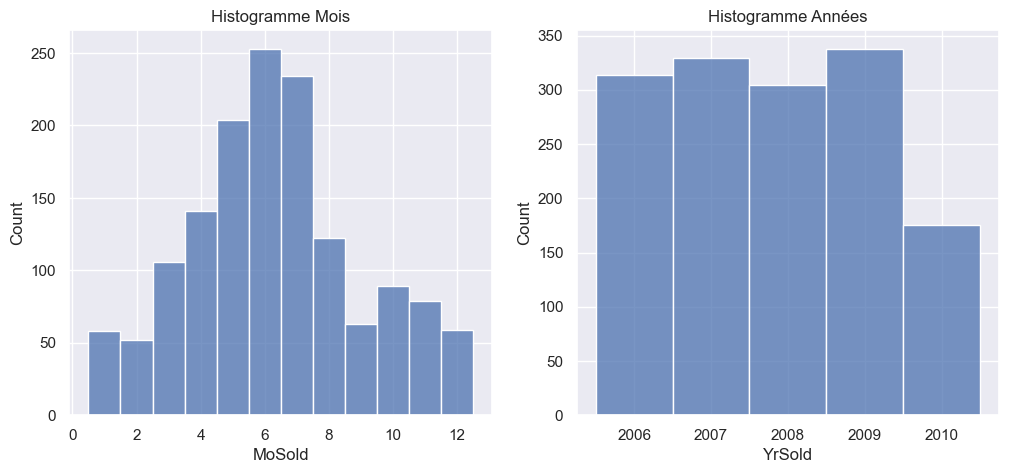

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data = train, x = 'MoSold', discrete = True, ax=axes[0])
axes[0].set_title('Histogramme Mois')

sns.histplot(data = train, x = 'YrSold', discrete = True, ax=axes[1])
axes[1].set_title('Histogramme Années')

plt.show()

Tous les mois sont couverts. Par contre, le nombre d'années est plutôt limité.

In [ ]:
def recode_mois(mois):
    if mois <=3:
        return "Janvier_Mars"
    elif mois <=6:
        return "Avril_Juin"
    elif mois <=9:
        return"Juillet_Septembre"
    else:
        return "Octobre_Decembre"

In [ ]:
train['MoSold_2'] = train['MoSold'].map(recode_mois)
train[['MoSold', 'MoSold_2']].head(3)

,MoSold,MoSold_2
0,2,Janvier_Mars
1,5,Avril_Juin
2,9,Juillet_Septembre


In [ ]:
train.drop(['MoSold'], axis = 1, inplace = True)

## 1.4 Statistiques descriptives

### 1.4.1 Variable cible : SalePrice

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


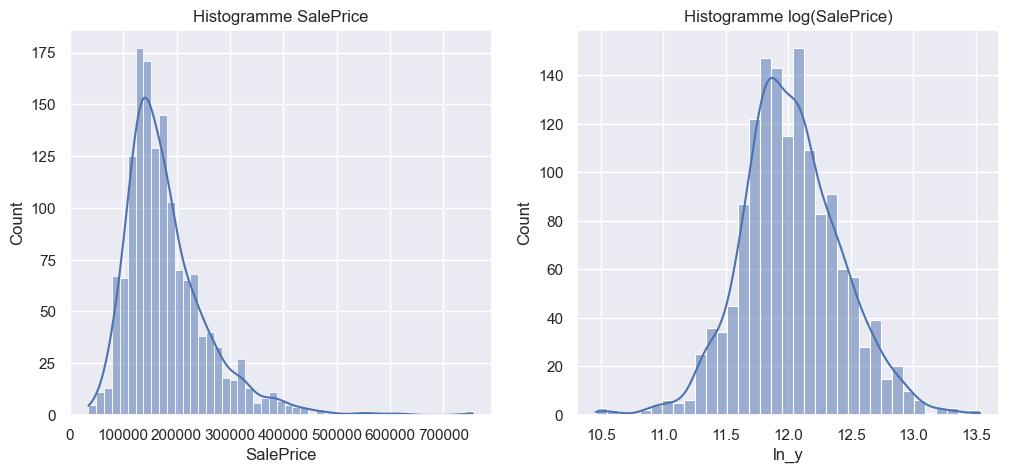

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data = train, x = 'SalePrice', kde = True, ax=axes[0])
axes[0].set_title('Histogramme SalePrice')

train['ln_y'] = np.log(train['SalePrice'])
sns.histplot(data = train, x = 'ln_y', kde = True, ax=axes[1])
axes[1].set_title('Histogramme log(SalePrice)')

plt.show()

### 1.4.2 Variables explicatives

In [ ]:
train.drop(['SalePrice', 'ln_y'], axis = 1).dtypes.value_counts()

object     48
int64      29
float64     1
Name: count, dtype: int64

### 1.4.3 Variables qualitatives

In [ ]:
train.describe(include = ['object'])

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,GarageYrBlt_2,MoSold_2
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,6,6,3,4,5,5,9,6,5,4
top,20,RL,Pave,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal,1950_1980,Avril_Juin
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,1311,1326,1340,1453,1179,1406,1267,1198,522,598


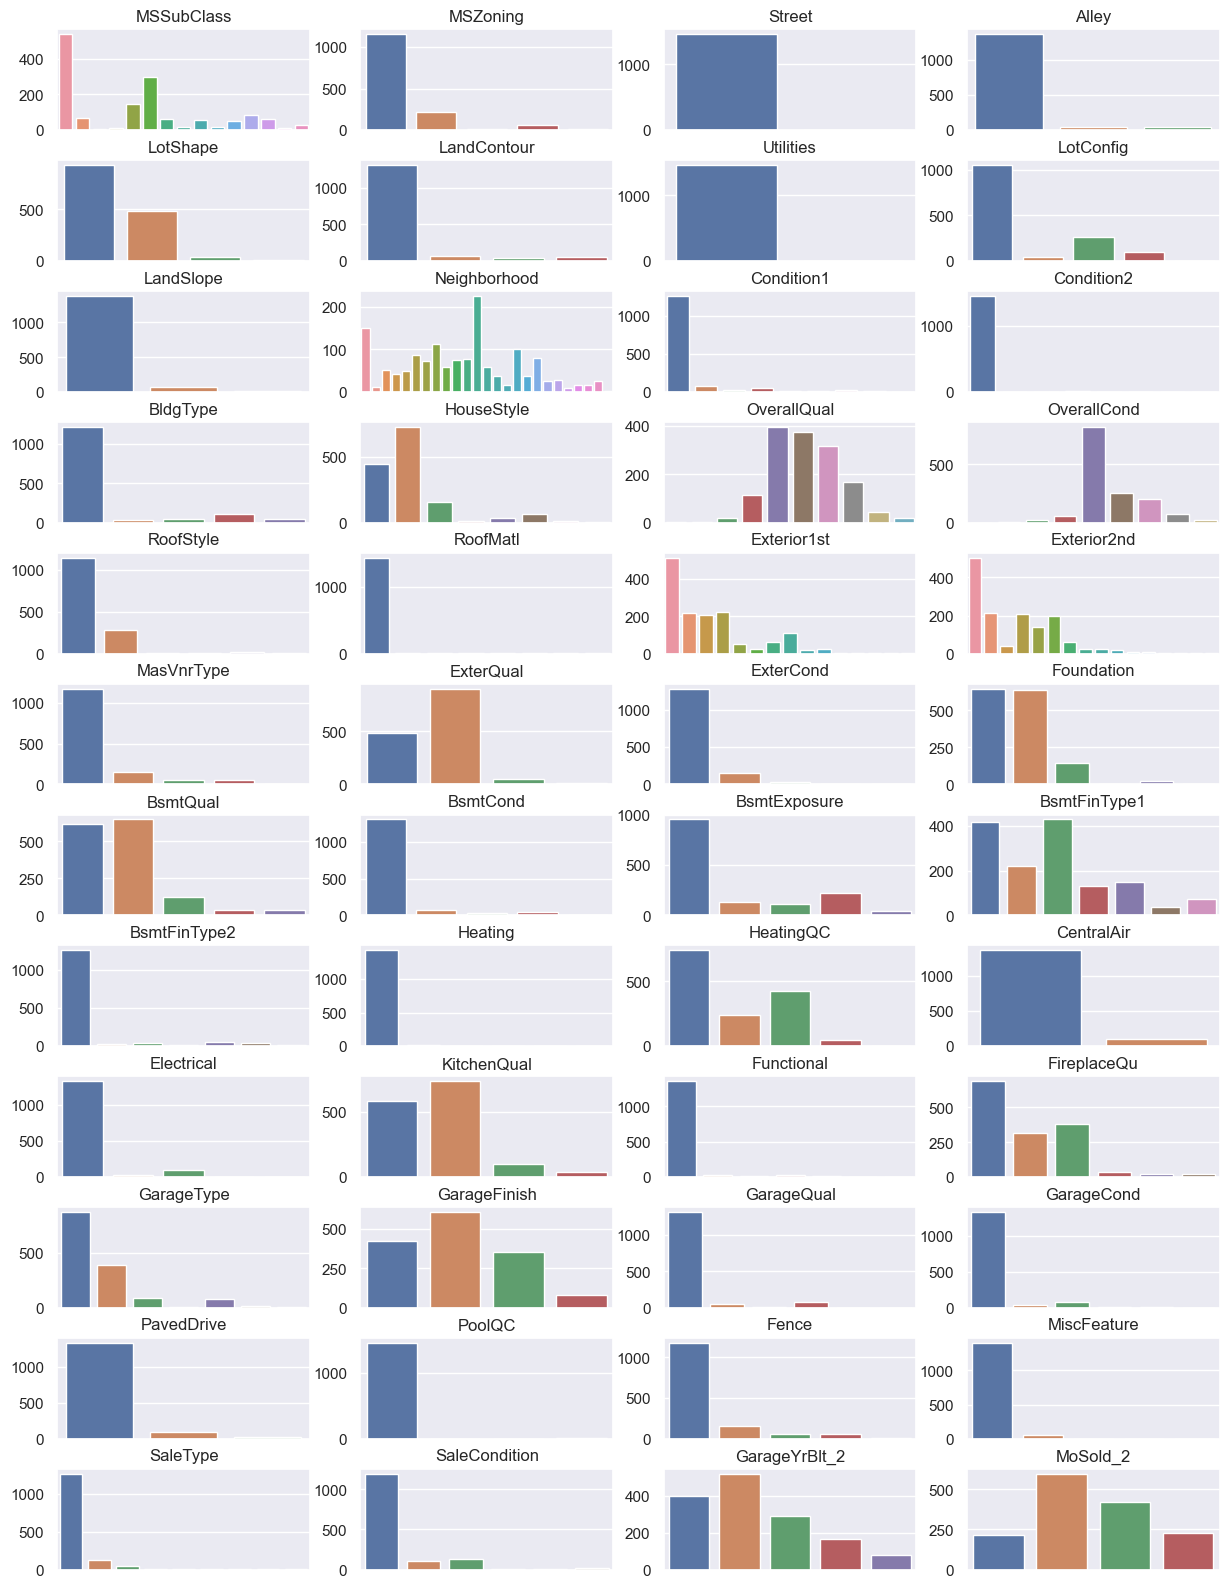

In [ ]:
var_quali = train.select_dtypes(['object']).columns.tolist()
ncols = 4
nrows = sum(divmod(len(var_quali), ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))
axes = axes.ravel()

for i, var in enumerate(var_quali):
    ax = axes[i]
    sns.countplot(x=var, data=train, ax=ax)
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(var)

plt.subplots_adjust(hspace=0.3)
plt.show()

Certaines variables sont constantes (ne prennent qu'une modalité), d'autres, presque. C'est le cas de **Street, Condition2 ou encore Functionnal**. Ces variables n'ont aucune chance de bien discriminer la variable cible. Au lieu de les inclure dans les modèles, il serait plus simple et plus économique de les supprimer. <br>
**Critère de sélection**: On supprimera toute variable qualitative dont une des modalités est prise par **90%** des observations

In [ ]:
seuil = 90

In [ ]:
maximum = []
nb_modalites = []

for var in var_quali:
    max_val = (train[var].value_counts(normalize = True)*100).max()
    nb_mod = train[var].nunique()
    maximum.append(max_val)
    nb_modalites.append(nb_mod)

VarFreqMax = pd.DataFrame({"variable" :var_quali, 'freq_max' : maximum, "nb_modalites" : nb_modalites})
VarFreqMax.sort_values(by = 'freq_max',ascending = False).head(10)

,variable,freq_max,nb_modalites
6,Utilities,99.931507,2
2,Street,99.589041,2
41,PoolQC,99.520548,4
11,Condition2,98.972603,8
17,RoofMatl,98.219178,8
29,Heating,97.808219,6
43,MiscFeature,96.301370,5
8,LandSlope,94.657534,3
3,Alley,93.767123,3
31,CentralAir,93.493151,2


In [ ]:
print(f"Nombre de variables quasi constantes :{sum(VarFreqMax['freq_max']>=seuil)}")

var_constantes = VarFreqMax[VarFreqMax['freq_max']>=seuil]['variable'].tolist()

train.drop(var_constantes, axis = 1, inplace = True)
print(f"Nouvelles dimensions du Dataset: {train.shape}")

Nombre de variables quasi constantes :14
Nouvelles dimensions du Dataset: (1460, 66)


Observons à présent à quel point les variables qualitatives restantes discriminent la variable cible

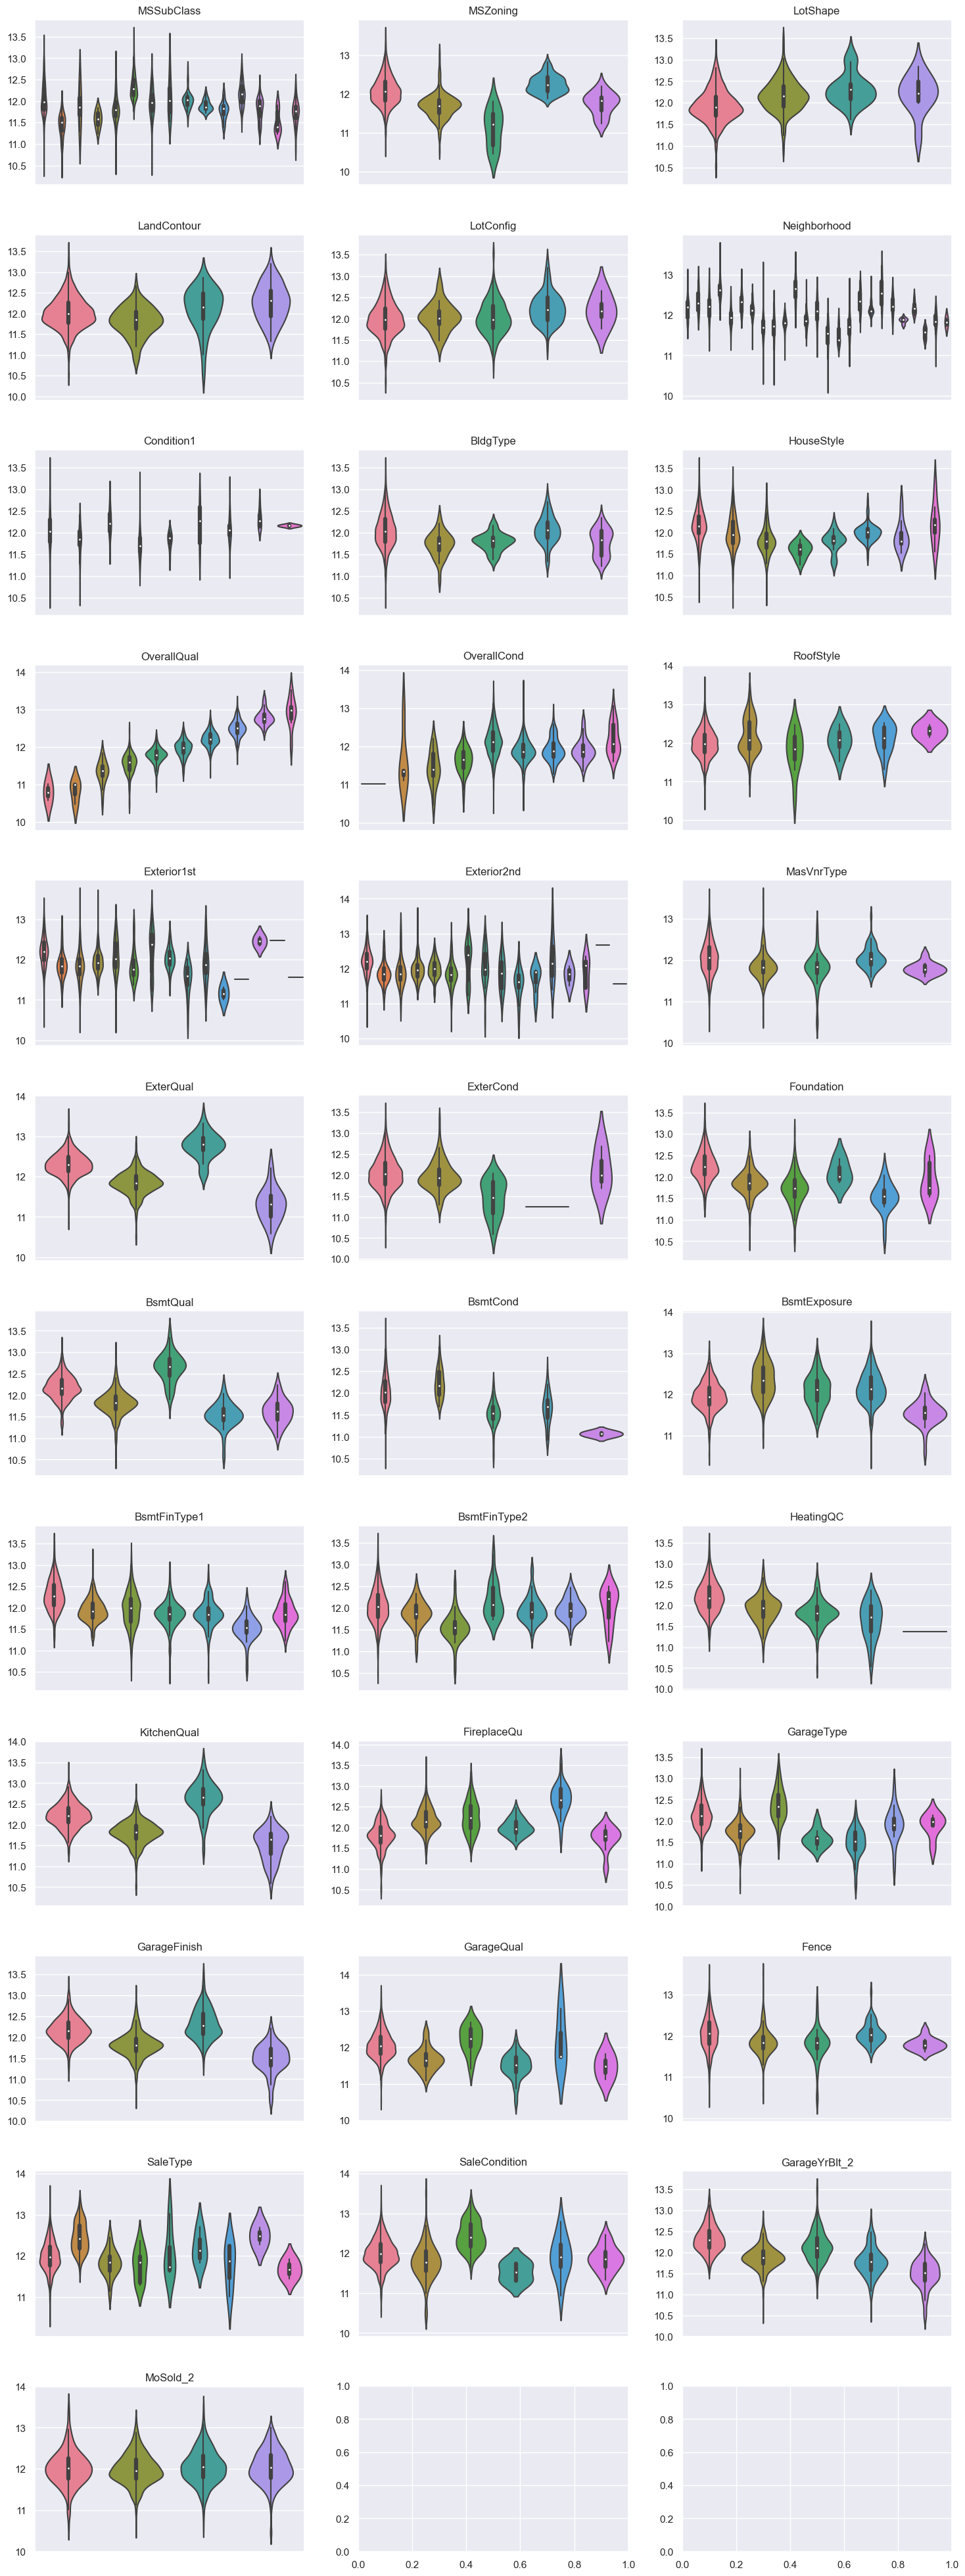

In [ ]:
var_quali = train.select_dtypes(['object']).columns.tolist()

ncols = 3
nrows = sum(divmod(len(var_quali), ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 50))
axes = axes.ravel()

for i, var in enumerate(var_quali):
    ax = axes[i]
    sns.violinplot(x=var, y='ln_y', data=train, palette='husl', ax=ax)
    ax.set_title(var)
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('')

plt.subplots_adjust(hspace=0.3)
plt.show()

### Variables quantitatives

In [ ]:
train.drop(['SalePrice', 'ln_y'], axis = 1).describe(include = ['float', 'int'])

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753
std,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095
min,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000
50%,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
75%,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
max,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000


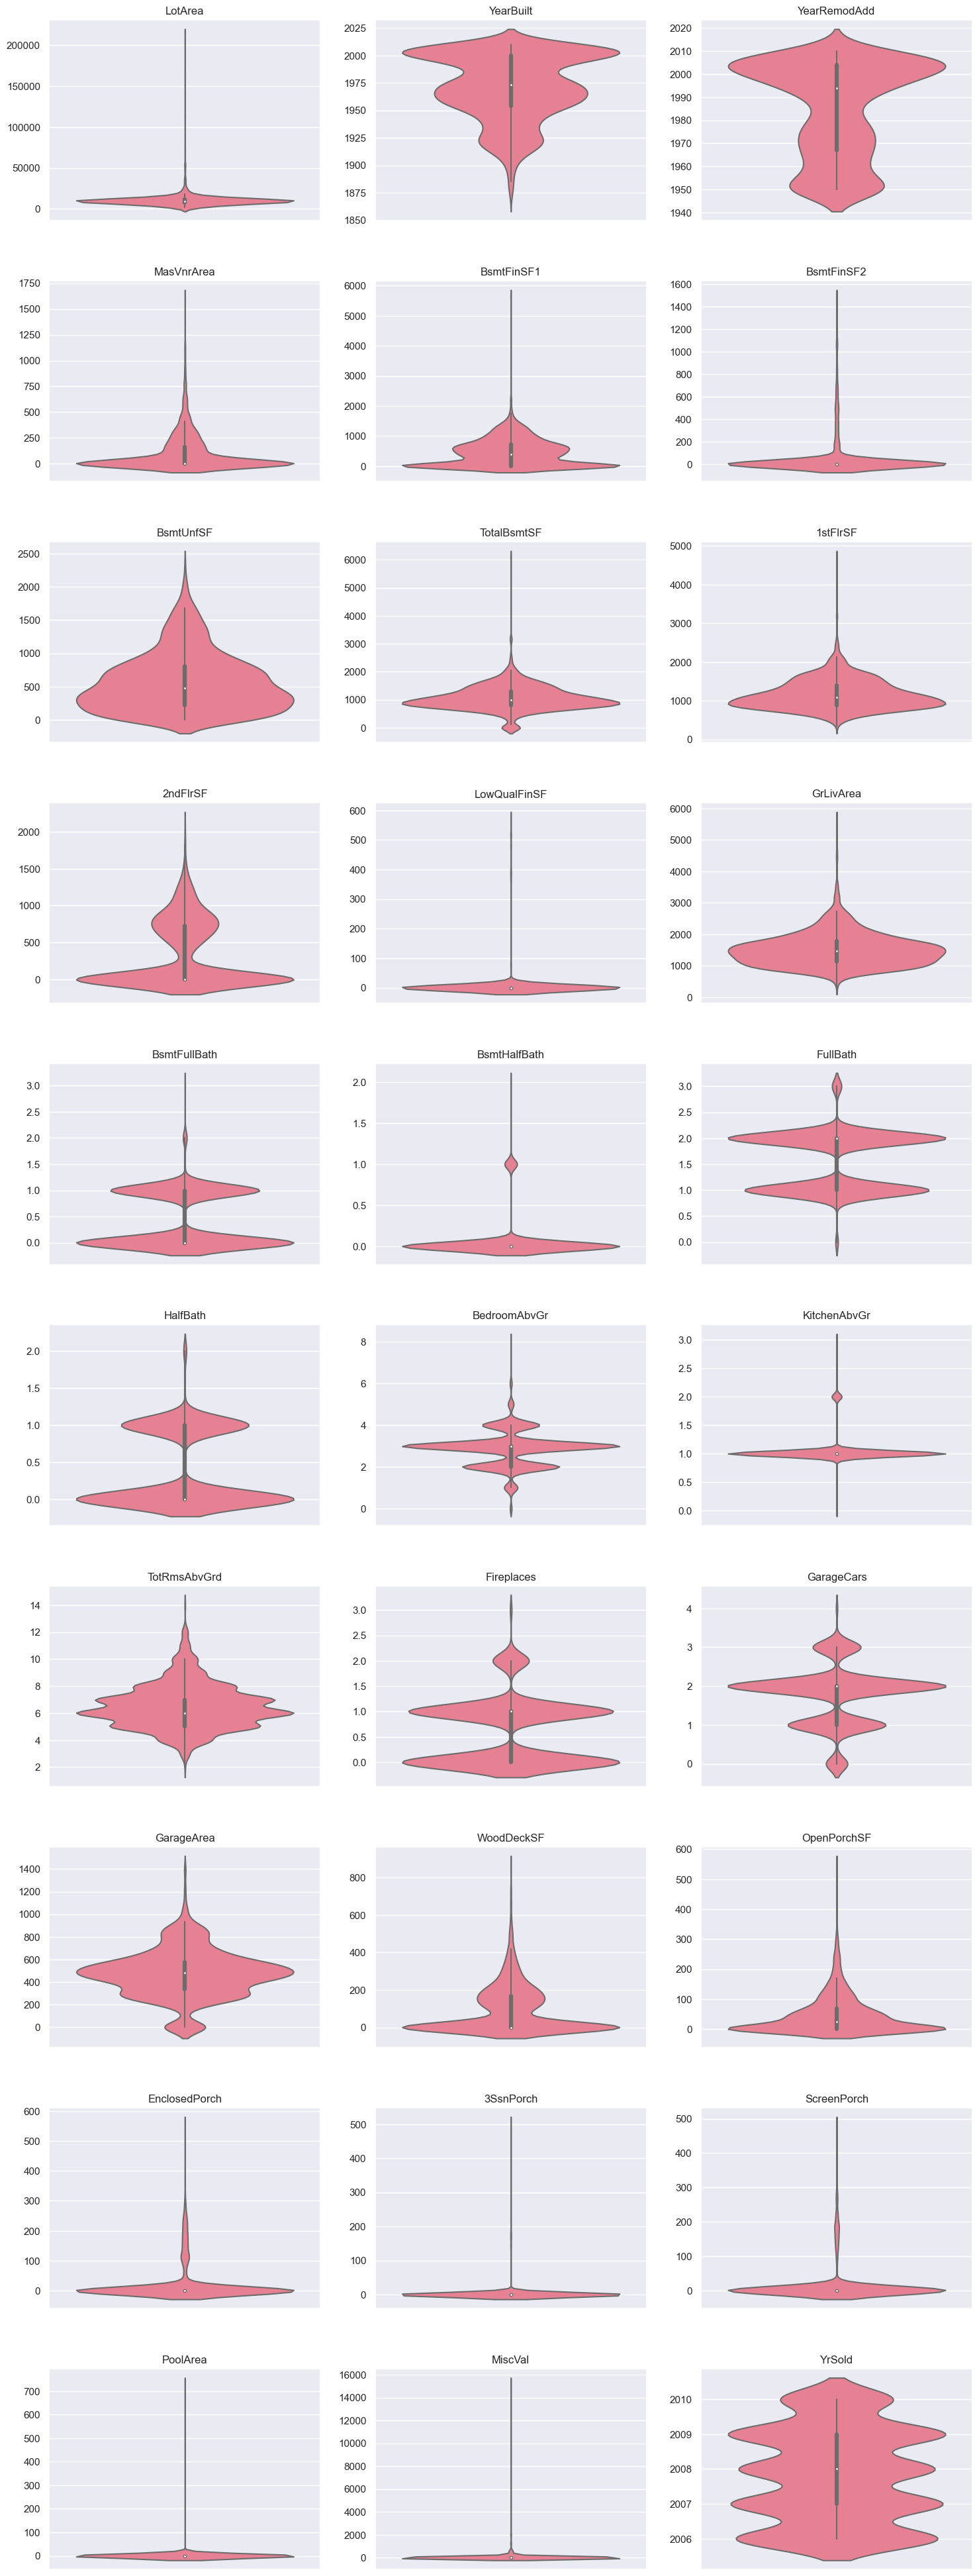

In [ ]:
var_quant = train.drop(['ln_y', 'SalePrice'], axis = 1).select_dtypes(['int', 'float']).columns.tolist()

ncols = 3
nrows = sum(divmod(len(var_quant), ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 50))
axes = axes.ravel()

for i, var in enumerate(var_quant):
    ax = axes[i]
    sns.violinplot(y=var, data=train, palette='husl', ax=ax)
    ax.set_title(var)
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('')

plt.subplots_adjust(hspace=0.3)
plt.show()

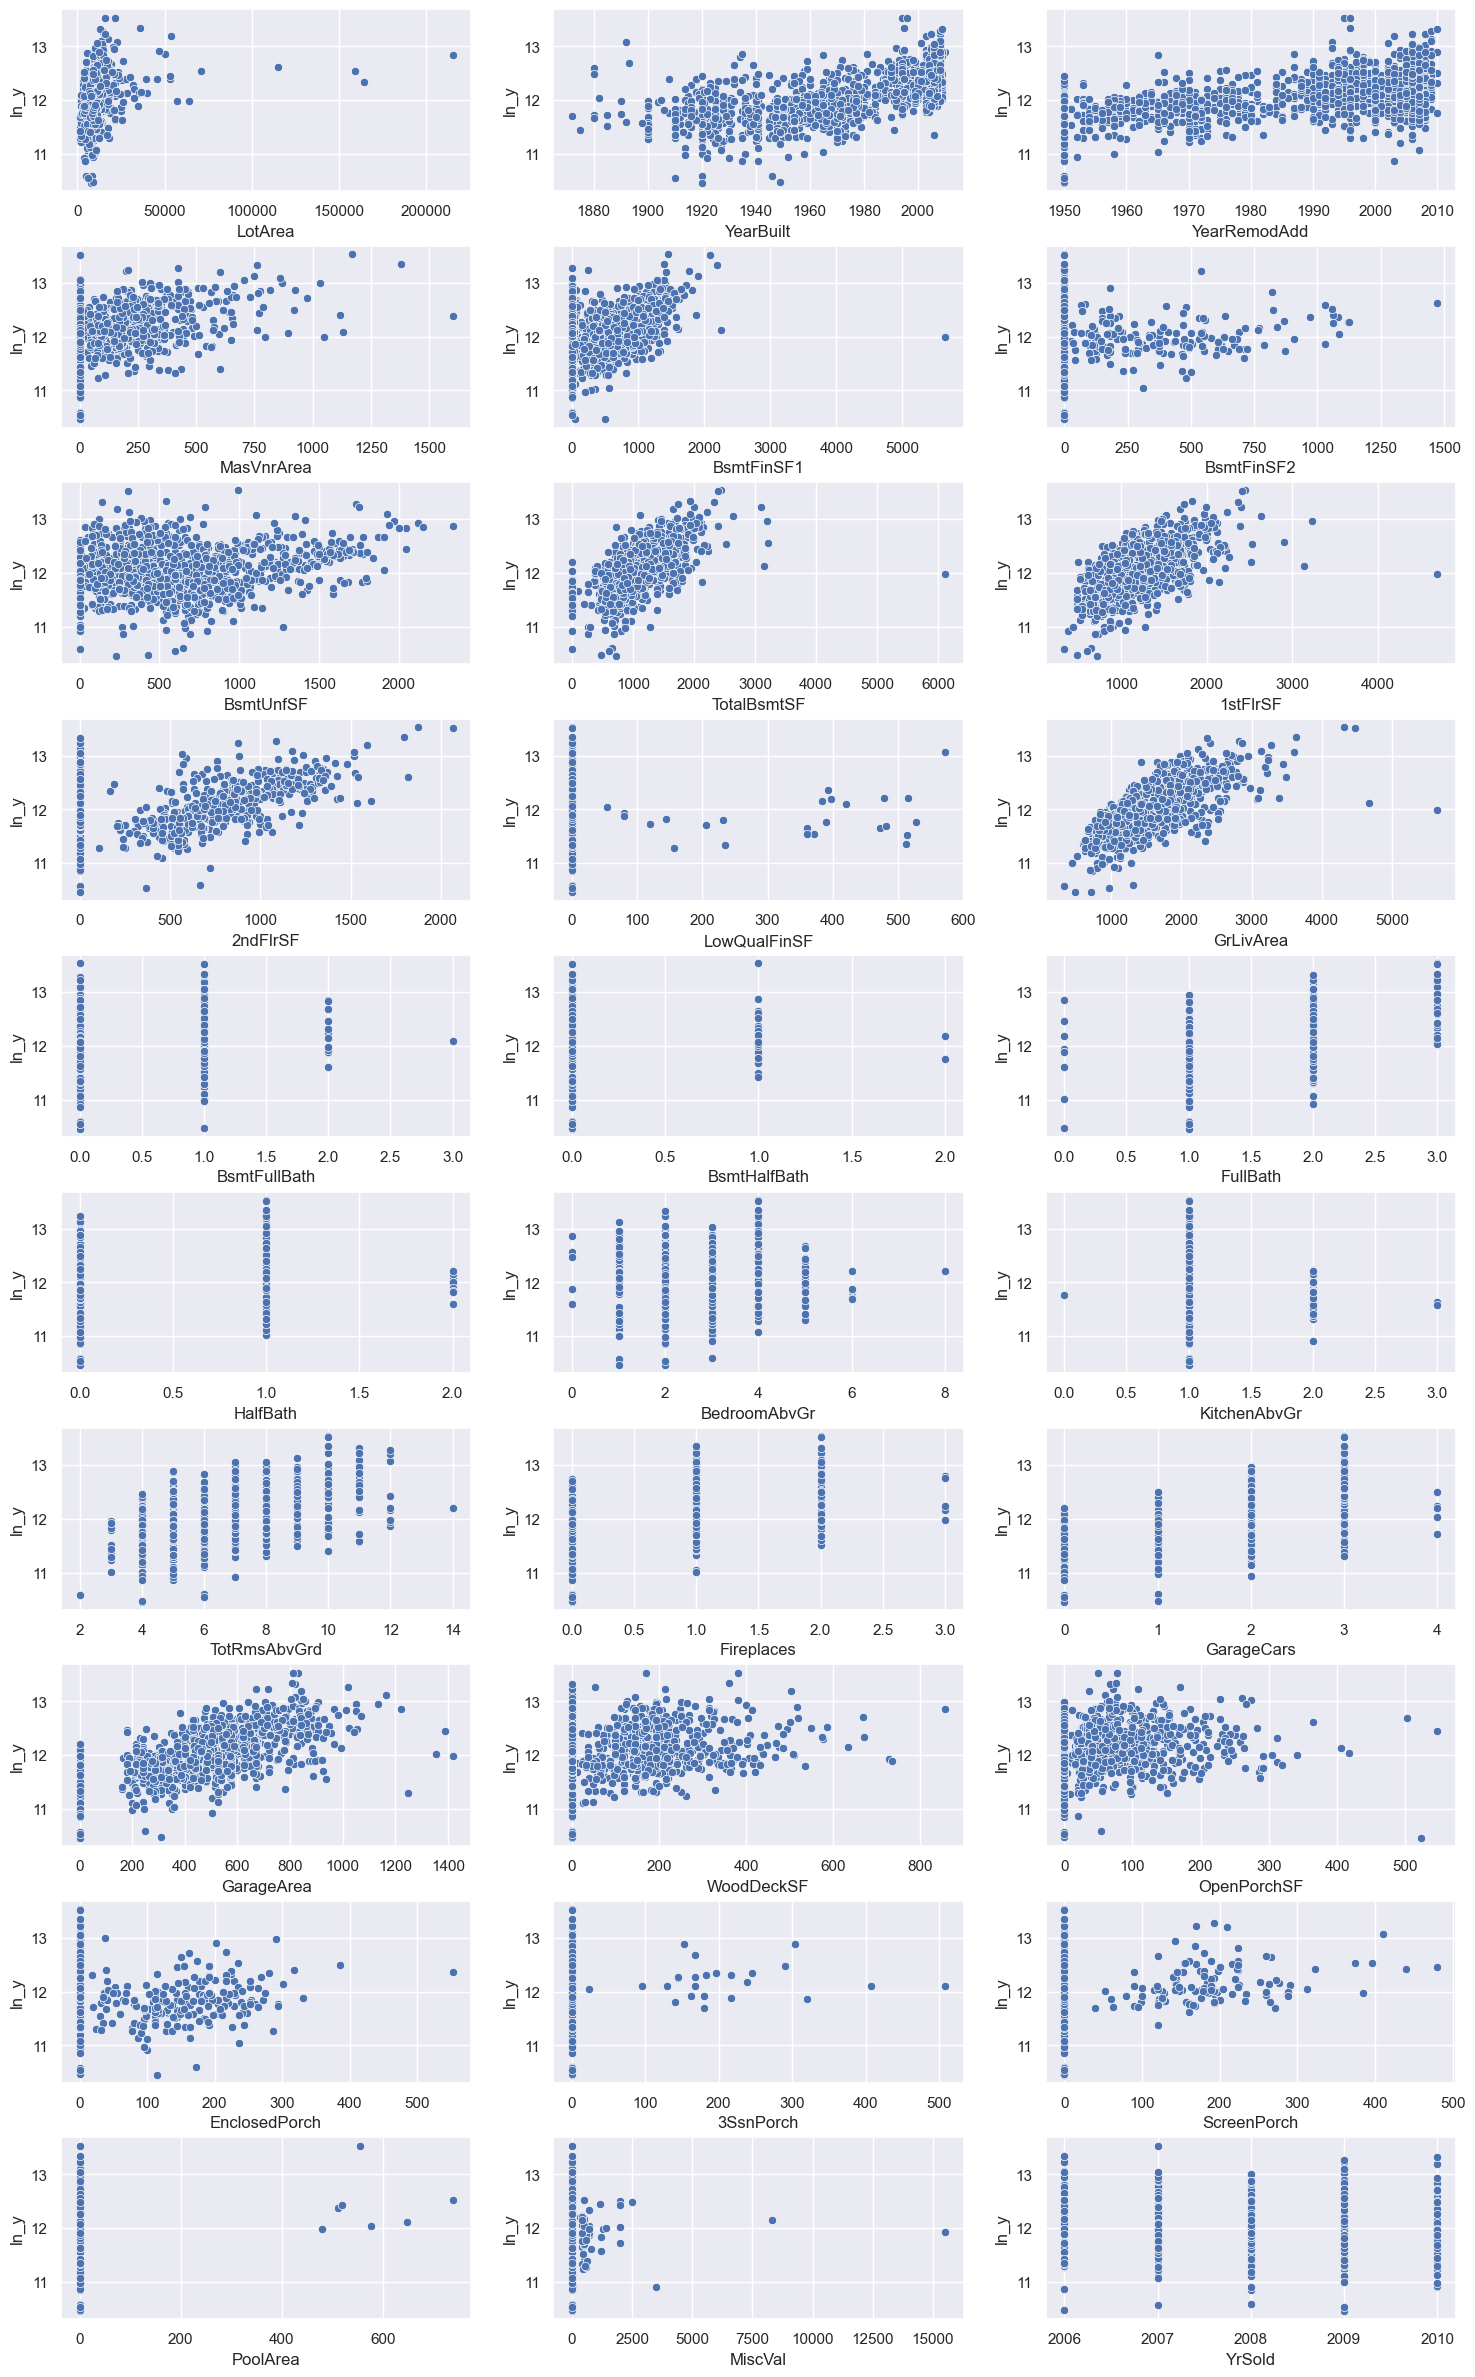

In [ ]:
ncols = 3
nrows = sum(divmod(len(var_quant), ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 30))
axes = axes.ravel()

for i, var in enumerate(var_quant):
    sns.scatterplot(x=var, y='ln_y', data=train, ax=axes[i])

plt.subplots_adjust(hspace=0.3)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


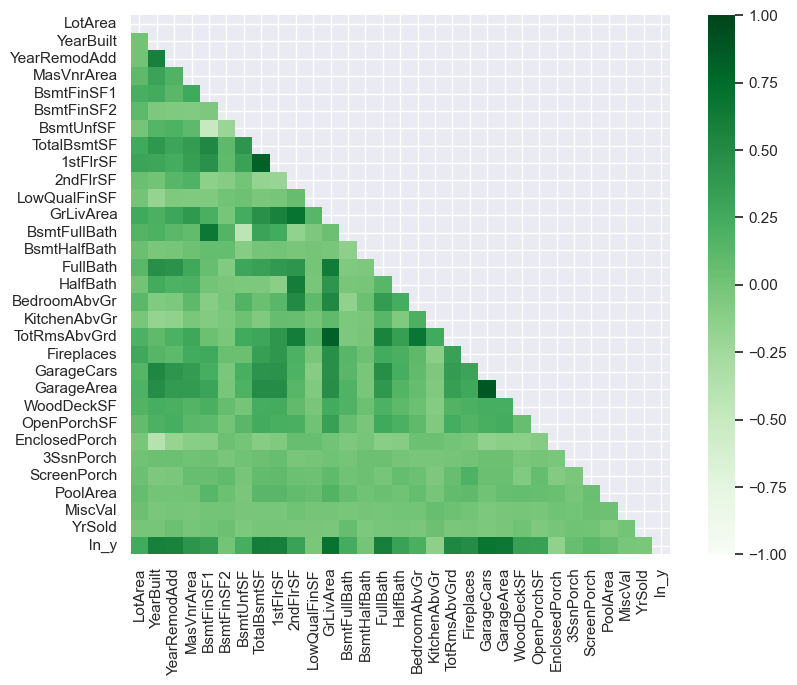

In [ ]:
plt.figure(figsize=(10, 7))
corr = train.drop(['SalePrice'], axis = 1).select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True,
            fmt='.3f',
            mask=mask,
            cbar=True, vmin=-1, vmax=1);

In [ ]:
train = train.drop(['SalePrice'], axis = 1)

KeyError: "['SalePrice'] not found in axis"

In [ ]:
train.shape

(1460, 65)

In [ ]:
from sklearn.feature_selection import SelectKBest, r_regression

In [ ]:
k = 10

# select the 20 best features
X = train[var_quant]
y = train[['ln_y']]
Kbest_quanti = SelectKBest(r_regression, k=k).fit(X, y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Kbest_quanti = Kbest_quanti.get_feature_names_out().tolist()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#anova_results = pd.DataFrame(columns=['Variable', 'F_value', 'p_value'])
value_F = []
value_p = []

# Itération sur les colonnes qualitatives
for col in var_quali:
    # Formule de l'ANOVA
    formula = f'ln_y ~ {col}'

    # Ajustez le modèle
    model = ols(formula, data=train).fit()

    # Récupérez la F-value et p-value
    value_F.append(model.fvalue)
    value_p.append(model.f_pvalue)

# Affichez les résultats
anova_res = pd.DataFrame({"variable": var_quali, "F_value":value_F, "p_value" :value_p})

In [ ]:
anova_res.sort_values(by = 'p_value').head(5)

,variable,F_value,p_value
9,OverallQual,332.166377,0.000000e+00
5,Neighborhood,79.520424,4.043304e-243
15,ExterQual,415.303357,6.935425e-195
18,BsmtQual,300.392324,2.031282e-188
24,KitchenQual,393.320196,4.441486e-187


In [ ]:
Kbest_quali = anova_res.sort_values(by = 'p_value').head(20-k).variable.tolist()

In [ ]:
train = train[Kbest_quali + Kbest_quanti + ['ln_y']]

## 1.5 Exportation base

In [ ]:
import json

In [ ]:
# Convertir les types en chaînes pour la sérialisation JSON
types_serializable = {col: str(train[col].dtype) for col in train.columns}

# Sauvegarde des types de données dans un fichier JSON
with open("../data/data_types.json", "w") as f:
    json.dump(types_serializable, f)

# Exportation du DataFrame vers un fichier CSV
train.to_csv("../data/final_train.csv", sep=',', index=False)
